# Les algorithmes gloutons

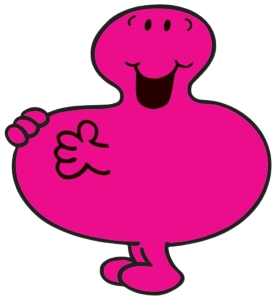
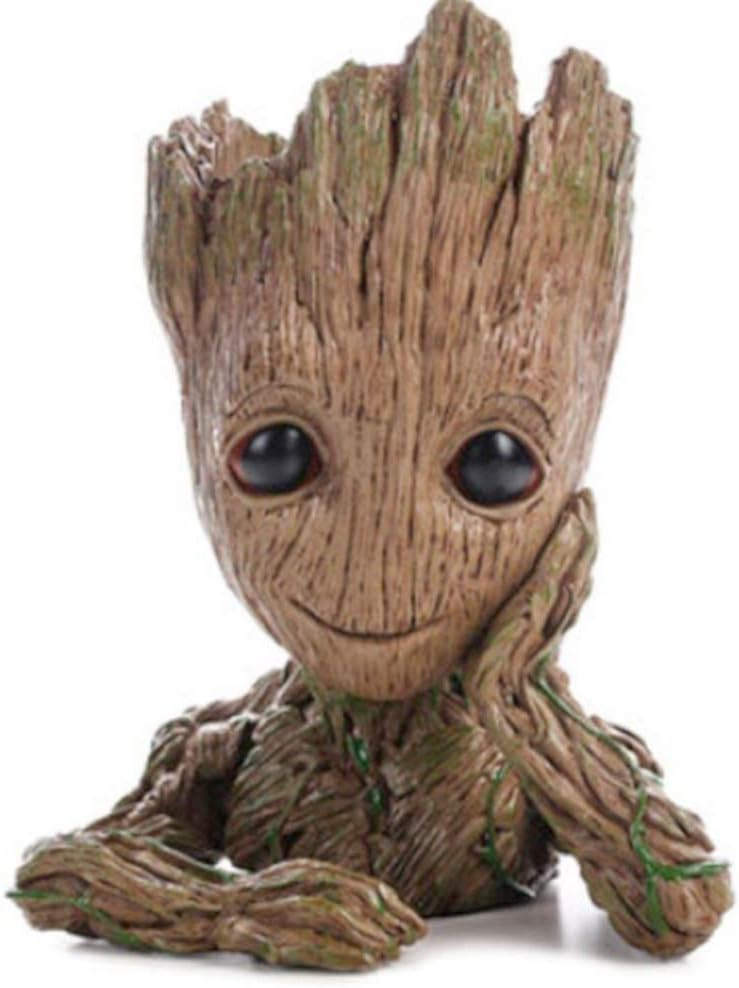
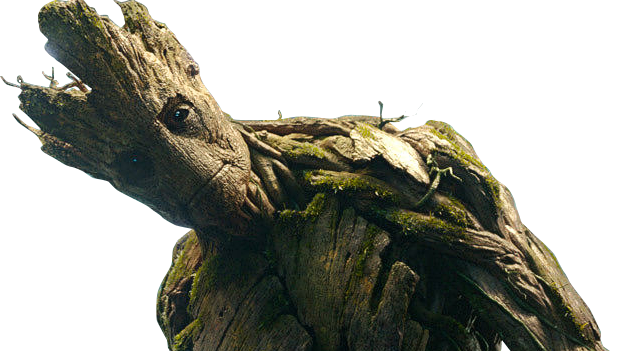
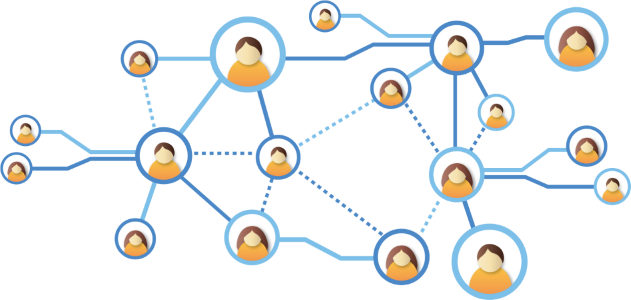
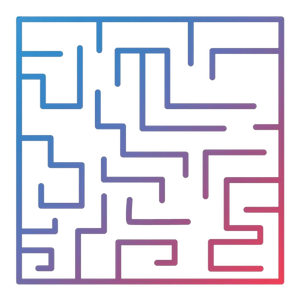
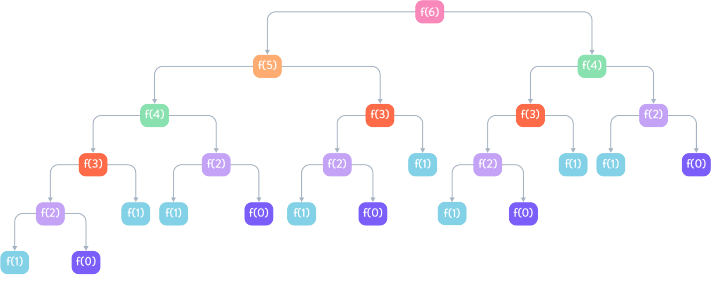

---
## Définition

Lorsque vous devez rendre de la monnaie à quelqu'un, vous allez naturellement rendre le billet ou la pièce avec la valeur maximum que vous pouvez, puis vous allez recommencer l'opération jusqu'à épuisement.  

**Par exemple, vous devez rendre 13.50 €**  
- Vous donnez tout d'abord un billet de 10€, il restera 3.50€,
- Vous donnez ensuite une pièce de 2€, il restera 1.50€,
- Vous donnez une pièce de 1€, il restera 0.50€,
- Vous donnez enfin une pièce de 0.50€ et vous avez terminé.  
  
A chaque étape, vous allez à la solution la plus proche du résultat. Vous avez appliqué un algorithme glouton !

> 📌 Un algorithme glouton détermine une solution après avoir effectué une série de choix. Pour chaque point de décision, il retient le choix qui semble **le meilleur à cet instant** (on parle de solution optimale). Il ne revient ensuite pas sur ce choix. 


## Quelques exemples

### Parcourir un chemin
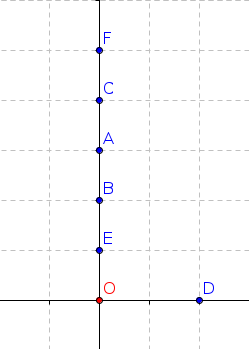
- Vous partez du point O.
- Vous devez passer par tous les points A, B, C, D, E, F.
- L'ordre de parcours des points n'est pas important.
La philosophie de l'algorithme glouton implique qu'à chaque étape, vous allez vous diriger vers le point le plus proche. Ainsi le parcours sera fait de la manière suivante :  
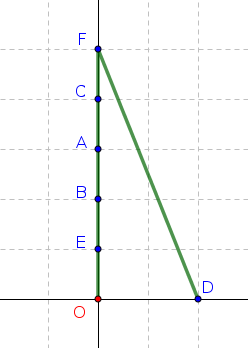
⚠️ Ce parcours résoud la problématique mais il n'est pas optimal, en effet le parcours ci-dessous résoud le problème avec un chemin plus court :
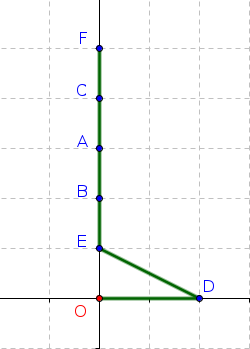


### Remplir un rectangle avec des carrés
- On considère un rectangle de dimension 11 sur 13. On veut remplir ce rectangle avec le minimum de carrés.  
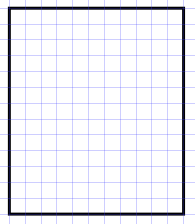
Un algorithme glouton va chercher à positionner d'abord le plus grand carré possible :  
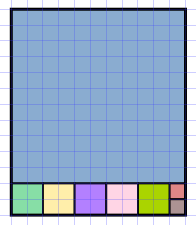
C'est une stratégie efficace avec 8 carrés, mais elle n'est pas optimale, la solution suivante permet de le faire avec seulement 6 carrés :  
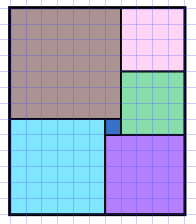

### Bilan
Un algorithme glouton est une méthode rapide et souvent efficace, mais qui ne garantit **pas l'optimalité** de la solution trouvée.  
La succession de meilleurs choix locaux va nous amener **à une bonne solution globale**, mais ne nous garantit pas d'arriver à la solution optimale.
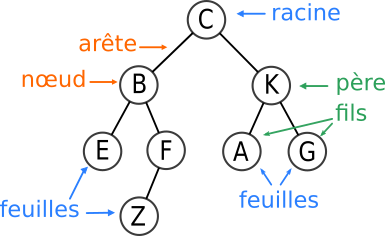
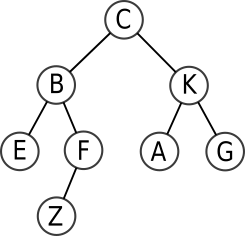
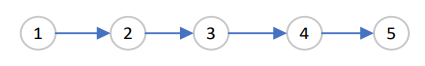
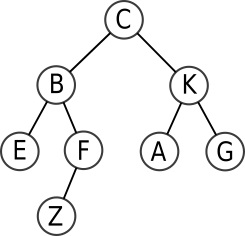
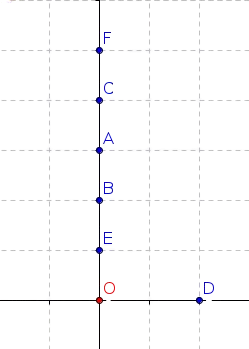

---
# Le problème du rendu de monnaie
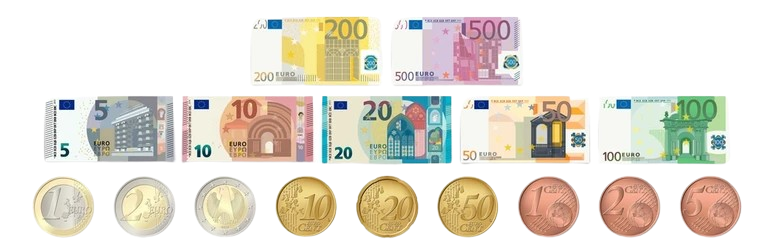

## Présentation
Nous allons travailler sur des sommes entières avec les pièces ou billets de **1**, **2**, **5**, **10**, **20**, **50**, **100**, **200** et **500** euros.

L'objectif est de créer un programme renvoyant, pour une somme entrée en paramètre, la combinaison utilisant un minimum de pièces ou de billets pour fabriquer la somme.

Par exemple, lorsque vous payez avec 20 € un objet coûtant 11 €, vous préférez qu'on vous rende vos 9 € de monnaie par $5+2+2$ plutôt que par $2+2+2+1+1+1$.

La résolution de ce problème peut se faire de manière gloutonne : à chaque étape, vous allez essayer de rendre la plus grosse pièce (ou billet) possible.

## Implémentation : 
💡Pour les besoins du TP, les pieces disponibles seront stockées dans une variable globale :   
`pieces = [500, 200, 100, 50, 20, 10, 5, 2, 1]` triée de manière décroissante pour prendre le maximum à chaque fois.   
⚠️ L'utilisation des variables globales est à effectuer avec beaucoup de prudence

In [ ]:
# à exécuter
pieces = [500, 200, 100, 50, 20, 10, 5, 2, 1]

---
### 💻 EXERCICE 1
> Implémentez une fonction `rendu(somme)`qui prend pour paramètre un entier positif et renvoie la liste des pièces à donner.  
> - **Algorithme :**  
> ```- On crée une liste vide qui contiendra la liste des pièces à rendre
>- On initialise un compteur i à 0
>- Tant que la somme à rendre est positive :
>    - Si pieces[i] <= la somme à rendre :
>        - On ajoute pieces[i] à la liste des pièces à rendre
>        - On décréemnte la somme à rendre de la valeur de la pièce ajoutée
>    - Sinon
>        - On incrémente notre compteur pour aller vérifier la pièce de valeur inférieure
>- Pour finir on retourne la liste des pièces à rendre
```

In [ ]:
# à compléter


In [ ]:
# Vérification : 
print(rendu(13))    # Doit renvoyer [10, 2, 1]
print(rendu(63))    # Doit renvoyer [50, 10, 2, 1]
print(rendu(488))   # Doit renvoyer [200, 200, 50, 20, 10, 5, 2, 1]

>Imaginons maintenant qu'il n'y ait plus de pièces de 10 et 5 euros.
>- Modifiez la variable globale `pieces` en conséquence.  

In [ ]:
# à modifier
pieces = 

>- Vérifions notre algorithme pour la somme de 63 euros.  

In [ ]:
print(rendu(63))

> - Est-ce une solution optimale (rendu avec un minimum de pieces) ? Si non, proposez une autre solution.

## 📌 Remarques :
- Lors d'un rendu de monnaie, l'algorithme glouton **n'est optimal que sous certaines conditions**.  
- Un système de monnaie est dit **canonique** lorsqu'il a été construit pour rendre l'algorithme glouton optimale.  
- Note : La majorité des systèmes actuels le sont, mais celà n'a pas toujours été le cas :  
Dans l’ancien système monétaire britannique qui avait cours avant 1971, la livre sterling était divisée en 20 shillings divisés chacun en 12 pence (pluriel de penny). La valeur des différentes pièces existantes était 1, 3, 4, 6, 12, 24, 30, 60, 120, 240 et 252 pence

---
# Le problème du sac à dos
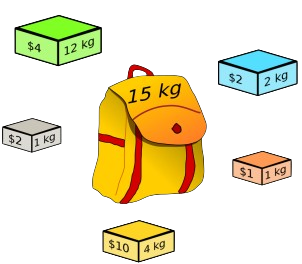

Le problème est celui-ci : vous disposez d'un sac d'une contenance limitée (sur le dessin ci-dessus, 15kg) dans lequel vous allez mettre des objets qui ont un certain poids et une certaine valeur.
Vous souhaitez maximiser la valeur totale des objets que vous mettez dans votre sac.
Evidemment, la somme de leur masse ne doit pas dépasser 15 kg.

Ce problème (de la catégorie des problème dits d'analyse combinatoire) malgré sa simplicité est un problème majeur d'optimisation.


## Préambule

Afin de résoudre le problème, nos allons utiliser une méthode gloutonne, mais au préalable nous allons avoir besoin de quelques fonctions

### Obtenir le second élément

Supposons qu'on dispose d'une liste  `l = [["A",3], ["B",2], ["C",8]]` et que l'on souhaite classer les éléments de cette liste par leur deuxième élément.  
Nous allons procéder en 2 temps :

Créer une fonction deuxieme qui prend en paramètre un tableau lst de type List et qui renvoie le deuxième élément de lst.

---
### 💻 EXERCICE 2
> Implémentez une fonction `deuxieme(lst)` qui prend en paramètre une liste et qui renvoie le deuxième élément de celle-ci.  

In [ ]:
# à compléter


In [ ]:
# Vérification
print(deuxieme([1, 2, 3, 4]))                        # Doit renvoyer 2
print(deuxieme(["un", "deux", "trois", "quatre"]))   # Doit renvoyer "deux"

### Tri d'une liste par le second élément

Nous allons utiliser la fonction `sorted`, qui prend en paramètre une liste à trier et une **fonction de tri** dans le paramètre `key`. Par exemple :

``` Python
>>> liste = [["A", 3], ["B", 2], ["C", 8]]
>>> newliste = sorted(liste, key=deuxieme, reverse=True)
>>> newliste
[['C', 8], ['A', 3], ['B', 2]]
``` 

---
### 💻 EXERCICE 3
> On considère une liste releve de 100 élèves avec leur note.

In [ ]:
# à exécuter
notes = [['Lucas', 13], ['Patrick', 4], ['Michelle', 15], ['Emmanuel', 8], ['Jacqueline', 3], ['Laurent', 11], ['Marcelle', 18], ['Maurice', 14], ['Michelle', 12], ['Michelle', 16], ['Alexandra', 12], ['Patricia', 18], ['Danielle', 15], ['Marc', 2], ['Hélène', 3], ['Benjamin', 16], ['Laetitia', 2], ['Hugues', 10], ['Samuel', 14], ['Émilie', 6], ['Emmanuel-Maurice', 15], ['Laurent', 13], ['Stéphane', 11], ['David', 16], ['Yves', 7], ['Xavier', 12], ['Véronique-Pauline', 6], ['Vincent-Hugues', 15], ['Céline', 11], ['Éric-Alain', 19], ['Samuel', 13], ['Grégoire', 16], ['Élodie', 13], ['Daniel', 2], ['Joseph', 18], ['Mathilde', 18], ['Claudine', 16], ['Jean', 12], ['Marcel', 8], ['Nicolas', 7], ['Luc', 11], ['Gabrielle', 8], ['Marianne', 8], ['Paul-Stéphane', 3], ['Florence', 18], ['Joseph', 18], ['Alice', 2], ['Frédérique', 17], ['Laurent', 4], ['Béatrice', 10], ['Agnès-Cécile', 13], ['Joséphine', 3], ['Gilbert', 8], ['Claire', 15], ['Tristan', 7], ['Nathan', 18], ['Cécile', 7], ['Laurent-Roland', 14], ['Christine', 14], ['Olivier', 4], ['Patrick', 18], ['Margot', 11], ['Jessica', 9], ['Guillaume', 19], ['Nicole', 8], ['Louise', 11], ['Kevin', 11], ['Hugues-Martin', 19], ['Emmanuel', 10], ['Nicolas', 5], ['Christiane', 7], ['Charles', 8], ['Paulette', 15], ['Colette', 7], ['Vanessa-Émilie', 6], ['Élise', 5], ['Denis', 2], ['Alfred', 20], ['Simone', 3], ['Océane-Joséphine', 9], ['Henri', 10], ['Rosalie', 6], ['Dorothée', 9], ['Rémy', 8], ['Marcel', 18], ['Odette', 19], ['Monique', 15], ['Mathieu', 12], ['Anne', 9], ['Stéphanie-Dominique', 9], ['Astrid', 10], ['René', 17], ['Laurence', 11], ['Océane', 16], ['Hugues', 7], ['Gérard', 11], ['Xavier', 4], ['Patricia', 19], ['Aurélie', 17], ['Théodore', 5]]

> Comment obtenir le nom de l'élève qui a obtenu la meilleure note ?

In [ ]:
# à compléter


## Retour au sac à dos

### Problématique
On considère un sac de 40 kg et les objets suivants :

|Objet           |  A  |  B  |  C  |  D  |  E  |  F  |
|:-:             | :-: | :-: | :-: | :-: | :-: | :-: | 
|**Masse _(kg)_**| 13  | 12  | 8   | 10  | 14  | 18  |
|**Valeur _(€)_**| 700 | 500 | 200 | 300 | 600 | 800 |

Quels objets faut-il prendre pour avoir une somme maximale sans dépasser la capacité du sac ?  
⚠️ On ne peut prendre qu'un seul objet de chaque type 


### Avec un algorithme glouton
On va classer les objets dans l'ordre décroissant de leur **taux de valeur** (taux de valeur = valeur / masse). Ainsi le premier élément de la liste sera celui ayant le meilleur rapport valeur/masse.
On prend le premier élément de la liste, puis le deuxième, etc., tant que le sac peut encore les contenir.


---
### 💻 EXERCICE 4
> - Créez une liste `objets` contenant tous les objets, chaque objet sera une liste (nom,masse,valeur)

In [ ]:
# à compléter


>- Créez une fonction `ratio(o)` qui prend en paramètre une liste décrivant un objet (exemple : `["C", 8, 200]` ) et qui renvoie le nombre valeur/masse (donc le 3ème élément divisé par le 2ème)

In [ ]:
# à compléter


In [ ]:
# Vérification
ratio(['D', 10, 300])  # Doit renvoyer 30.0

>- Créez maintenant une liste `objets_tries` qui reprend les objets de la liste `objets` classés suivant leur taux de valeur (ratio valeur/masse) du plus élevé au plus faible.

In [ ]:
# à compléter


In [ ]:
# Vérification
objets_tries

> - Écrivez enfin une fonction `butin(ob,capa)` qui prend en paramètre une liste d'objets et la capacité maximum de notre sac et implémente l'algorithme de résolution gloutonne du problème du sac à dos.

In [ ]:
# à compléter


In [ ]:
# Vérification
butin(objets,40)  # Doit renvoyer ['A', 'F', 'C'] 

**📌 La combinaison trouvée est donc A, F, C qui rapporte 1 700 € pour un poids de 39 kg.**

## Solution optimale ?

Afin de vérifier si cette solution est optimale, nous allons tester toutes les combinaisons possibles (64 dans ce cas précis). Cette méthode bien connue s'appelle la **force brute**.  
  
**Cette méthode permet d'identifier la solution A, B, E qui rapporte 1 800 € pour un poids de 39 kg.**

Cependant, elle sera très longue et inenvisageable si la liste comporte un trop grand nombre d'éléments tandis que la méthode gloutonne donnera une solution **acceptable** de manière très rapide.

